In [1]:
# ## Imports
import os
import json
import boto3
import requests
import numpy as np
import pandas as pd
from io import StringIO
from datetime import timedelta
from datetime import datetime
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport


import matplotlib.pyplot as plt

In [2]:
def change():

    names = {"DAI"  : 'dai',
        "GUSD"  : 'gemini-dollar',
        # "SUSD"  : 'susd',
        "TUSD"  : 'true-usd',
        "USDC"  : 'usd-coin',
        "USDP"  : 'usdp',
        "USDT"  : "tether",
        "BAL"   : "balancer",
        "WETH"   : "ethereum",
        "LINK"  : "chainlink",
        "MKR"   : "maker",
        "RAI"   : "rai",
        "UNI"   : "uniswap",
        "WBTC"  : "wrapped-bitcoin",
        "XSUSHI": "xsushi",
        "YFI"   : "yearn-finance",
        "BUSD"  : "binance-usd",
        "FEI"   : "fei-usd",
        "FRAX"  : "frax",
        "AAVE"  : "aave",
        "AMPL"  : "ampleforth",
        "BAT"   : "basic-attention-token",
        "CRV"   : "curve-dao-token",
        "DPI"   : "defipulse-index",
        # "ENJ"   : "enjin-coin",
        "KNC"   : "kyber-network-crystal",
        "MANA"  : "decentraland",
        # "REN"   : "ren",
        "RENFIL": "renfil",
        # "SNX"   :"synthetix-network-token",
        "ZRX"   : "0x"
        }
    columns = []
    columns.append('timestamp')
    for key in list(names.keys()):
        columns.append(key+'_price')
        columns.append(key+'_%change(10)')
    df        = pd.DataFrame(columns = columns)
    LOOK_BACK = 375 * 2
    #LIMIT     = 5
    WBTC      = []
    request   = requests.get("https://api.coingecko.com/api/v3/coins/"+ str(names['WBTC'])+ "/market_chart?vs_currency=usd&days=max&interval=daily")
    data      = request.json()
    WBTC      = data['prices']
    tt        = []
    P         = []
    for day in data['prices'][-LOOK_BACK:]:
        tt.append(day[0]/1000)
        P.append(day[1])
    df['WBTC_price'] = P
    df['timestamp']  = tt
    track = {}
    for asset in list(names.keys()):#[:LIMIT]:
        if asset == 'WBTC':
            continue
        request = requests.get("https://api.coingecko.com/api/v3/coins/"+ str(names[asset])+ "/market_chart?vs_currency=usd&days=max&interval=daily")
        data = request.json()
        tt = []
        P = []
        
        if len(data['prices']) < LOOK_BACK:
            req = LOOK_BACK - len(data['prices'])
            addition = WBTC[-LOOK_BACK:  -LOOK_BACK + req ]
            data['prices'] = addition + data['prices']
            track[asset] = req
        else:
            data['prices'] = data['prices'][-LOOK_BACK:]
        
        for day in data['prices']:
            tt.append(day[0]/1000)
            P.append(day[1])
        df[asset+'_price'] = P
        df['timestamp']  = tt
    df['timestamp'] = tt
    for asset in list(names.keys()):#[:LIMIT]:
        
        diff_10 = pd.DataFrame(df[asset+'_price'].diff(periods=10) )
        change = []
        for i in range(10):
            change.append('Nan')
        for i in range(10,df.shape[0]):
            change.append((diff_10.iloc[i][asset+'_price'] / df.iloc[i-10][asset+'_price']) * 100)
        df[asset+'_%change(10)'] = change
        
        diff_1 = pd.DataFrame(df[asset+'_price'].diff(periods=1) )
        change = []
        for i in range(10):
            change.append('Nan')
        for i in range(10,df.shape[0]):
            change.append((diff_1.iloc[i][asset+'_price'] / df.iloc[i-10][asset+'_price']) * 100)
        df[asset+'_%change(1)'] = change        
    for key in track.keys():
        df[key+'_%change(10)'][:track[key]] = df['WBTC_%change(10)'][:track[key]]

    df['date'] = df['timestamp'].apply(lambda x : str(datetime.fromtimestamp(x).date()))
    df  = df.iloc[::-1]
    df  = df.reset_index()
    df = df.drop(['index'], axis=1)

    df = df[:-10]

    print("CHECK POINT ")
    return df

In [ ]:
# transactionResponse = {}
# names = {"DAI"  : 'dai',
#         "GUSD"  : 'gemini-dollar',
#         # "SUSD"  : 'susd',
#         "TUSD"  : 'true-usd',
#         "USDC"  : 'usd-coin',
#         # "USDP"  : 'usdp',
#         "USDT"  : "tether",
#         "BAL"   : "balancer",
#         "WETH"   : "ethereum",
#         "LINK"  : "chainlink",
#         "MKR"   : "maker",
#         "RAI"   : "rai",
#         "UNI"   : "uniswap",
#         "WBTC"  : "wrapped-bitcoin",
#         "XSUSHI": "xsushi",
#         "YFI"   : "yearn-finance",
#         "BUSD"  : "binance-usd",
#         "FEI"   : "fei-usd",
#         "FRAX"  : "frax",
#         "AAVE"  : "aave",
#         "AMPL"  : "ampleforth",
#         "BAT"   : "basic-attention-token",
#         "CRV"   : "curve-dao-token",
#         "DPI"   : "defipulse-index",
#         # # "ENJ"   : "enjin-coin",
#         "KNC"   : "kyber-network-crystal",
#         "MANA"  : "decentraland",
#         # "REN"   : "ren",
#         "RENFIL": "renfil",
#         # "SNX"   :"synthetix-network-token",
#         "ZRX"   : "0x"
#         }
# errors = []
# print("Creating key")
# transactionResponse = {"result":{"AAVEV2":{}}}
# ind       = 0
# look_back = 1


In [ ]:
## Compaound market historial API

In [ ]:
# res  = requests.get("https://api.compound.finance/api/v2/ctoken")
# for ctoken in res.json()['cToken'][6:]:
#     print(ctoken['symbol'],ctoken['token_address'])
#     res = requests.get("https://api.compound.finance/api/v2/market_history/graph?asset=%s&min_block_timestamp=1633285800&max_block_timestamp=1634149800&num_buckets=40" %ctoken['token_address']);            
    
#     print(res.json())
#     break

In [3]:
names = {"DAI"  : 'dai',
        "TUSD"  : 'true-usd',
        "USDC"  : 'usd-coin',
        "USDT"  : "tether",
        "ETH"   : "ethereum",
        "LINK"  : "chainlink",
        "MKR"   : "maker",
        "UNI"   : "uniswap",
        "WBTC"  : "wrapped-bitcoin",
        "WBTC2"  : "wrapped-bitcoin",
        "SUSHI" :"sushi",  
        "YFI"   : "yearn-finance",
        "AAVE"  : "aave",
        "BAT"   : "basic-attention-token",
        "ZRX"   : "0x",
        "REP"   : "augur",
        "SAI"   : "sai",
        }

def change():    
    columns = []
    columns.append('timestamp')
    print(names)
    for key in list(names.keys()):
        columns.append(key+'_price')
        columns.append(key+'_%change(10)')
    df        = pd.DataFrame(columns = columns)
    LOOK_BACK = 375 * 2
    #LIMIT     = 5
    WBTC      = []
    request   = requests.get("https://api.coingecko.com/api/v3/coins/"+ str(names['WBTC'])+ "/market_chart?vs_currency=usd&days=max&interval=daily")
    data      = request.json()
    WBTC      = data['prices']
    tt        = []
    P         = []
    for day in data['prices'][-LOOK_BACK:]:
        tt.append(day[0]/1000)
        P.append(day[1])
    df['WBTC_price'] = P
    df['timestamp']  = tt
    track = {}
    for asset in list(names.keys()):#[:LIMIT]:
        if asset == 'WBTC':
            continue
        print("DEBUG 1 ", asset)
        request = requests.get("https://api.coingecko.com/api/v3/coins/"+ str(names[asset])+ "/market_chart?vs_currency=usd&days=max&interval=daily")
        data = request.json()
        tt = []
        P = []
        # print("DEBUG 1 ", data)
        if len(data['prices']) < LOOK_BACK:
            req = LOOK_BACK - len(data['prices'])
            addition = WBTC[-LOOK_BACK:  -LOOK_BACK + req ]
            data['prices'] = addition + data['prices']
            track[asset] = req
        else:
            data['prices'] = data['prices'][-LOOK_BACK:]

        for day in data['prices']:
            tt.append(day[0]/1000)
            P.append(day[1])
        df[asset+'_price'] = P
#         df['timestamp']  = tt
#     df['timestamp'] = tt
    for asset in list(names.keys()):#[:LIMIT]:

        diff_10 = pd.DataFrame(df[asset+'_price'].diff(periods=10) )
        change = []
        for i in range(10):
            change.append('Nan')
        for i in range(10,df.shape[0]):
            change.append((diff_10.iloc[i][asset+'_price'] / df.iloc[i-10][asset+'_price']) * 100)
        df[asset+'_%change(10)'] = change

        diff_1 = pd.DataFrame(df[asset+'_price'].diff(periods=1) )
        change = []
        for i in range(10):
            change.append('Nan')
        for i in range(10,df.shape[0]):
            change.append((diff_1.iloc[i][asset+'_price'] / df.iloc[i-10][asset+'_price']) * 100)
        df[asset+'_%change(1)'] = change        
    for key in track.keys():
        df[key+'_%change(10)'][:track[key]] = df['WBTC_%change(10)'][:track[key]]

    df['date'] = df['timestamp'].apply(lambda x : str(datetime.fromtimestamp(x).date()))
    df  = df.iloc[::-1]
    df  = df.reset_index()
    df = df.drop(['index'], axis=1)
    df = df[:-10]
    print("CHECK POINT ")
    return df[1:]

change_df = change()

# min_var = 9999999

{'DAI': 'dai', 'TUSD': 'true-usd', 'USDC': 'usd-coin', 'USDT': 'tether', 'ETH': 'ethereum', 'LINK': 'chainlink', 'MKR': 'maker', 'UNI': 'uniswap', 'WBTC': 'wrapped-bitcoin', 'WBTC2': 'wrapped-bitcoin', 'SUSHI': 'sushi', 'YFI': 'yearn-finance', 'AAVE': 'aave', 'BAT': 'basic-attention-token', 'ZRX': '0x', 'REP': 'augur', 'SAI': 'sai'}
DEBUG 1  DAI
DEBUG 1  TUSD
DEBUG 1  USDC
DEBUG 1  USDT
DEBUG 1  ETH
DEBUG 1  LINK
DEBUG 1  MKR
DEBUG 1  UNI
DEBUG 1  WBTC2
DEBUG 1  SUSHI
DEBUG 1  YFI
DEBUG 1  AAVE
DEBUG 1  BAT
DEBUG 1  ZRX
DEBUG 1  REP
DEBUG 1  SAI
CHECK POINT 


/home/nishgaba/anaconda3/envs/defi/lib/python3.6/site-packages/ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
!mkdir COMPOUND_DATA

In [ ]:
# names = {"DAI"  : 'dai',
#         "GUSD"  : 'gemini-dollar',
#         # "SUSD"  : 'susd',
#         "TUSD"  : 'true-usd',
#         "USDC"  : 'usd-coin',
#         # "USDP"  : 'usdp',
#         "USDT"  : "tether",
#         "BAL"   : "balancer",
#         "WETH"   : "ethereum",
#         "LINK"  : "chainlink",
#         "MKR"   : "maker",
#         "RAI"   : "rai",
#         "UNI"   : "uniswap",
#         "WBTC"  : "wrapped-bitcoin",
#         "XSUSHI": "xsushi",
#         "YFI"   : "yearn-finance",
#         "BUSD"  : "binance-usd",
#         "FEI"   : "fei-usd",
#         "FRAX"  : "frax",
#         "AAVE"  : "aave",
#         "AMPL"  : "ampleforth",
#         "BAT"   : "basic-attention-token",
#         "CRV"   : "curve-dao-token",
#         "DPI"   : "defipulse-index",
#         # # "ENJ"   : "enjin-coin",
#         "KNC"   : "kyber-network-crystal",
#         "MANA"  : "decentraland",
#         # "REN"   : "ren",
#         "RENFIL": "renfil",
#         # "SNX"   :"synthetix-network-token",
#         "ZRX"   : "0x"
#         }

In [5]:
names = {"DAI"  : 'dai',
        "TUSD"  : 'true-usd',
        "USDC"  : 'usd-coin',
        "USDT"  : "tether",
        "ETH"   : "ethereum",
        "LINK"  : "chainlink",
        "MKR"   : "maker",
        "UNI"   : "uniswap",
        "WBTC"  : "wrapped-bitcoin",
        "WBTC2"  : "wrapped-bitcoin",
        "SUSHI" :"sushi", # check -- - - - - -- 
        "YFI"   : "yearn-finance",
        "AAVE"  : "aave",
        "BAT"   : "basic-attention-token",
        "ZRX"   : "0x",
        "REP"   : "augur",
        "SAI"   : "sai",
        }

In [6]:
ind  = 0 
res  = requests.get("https://api.compound.finance/api/v2/ctoken")
df   = pd.DataFrame(columns = list(res.json()['cToken'][0].keys()))
for ctoken in res.json()['cToken'][3:]:
    
    print(ctoken['symbol'])
    if ctoken['symbol'] == 'cCOMP':
        continue

    ind += 1
    for key in ctoken.keys():
        try:
            df.at[ind,key ] = ctoken[key]['value']
        except:
            df.at[ind,key ] = ctoken[key]

    

    address   = ctoken['token_address']

    request   = requests.get("https://api.coingecko.com/api/v3/coins/"+ str(names[ctoken['symbol'][1:]])+ "/market_chart?vs_currency=usd&days=max&interval=daily")
    prices_df = pd.DataFrame(columns=['timestamp', 'price'])
    timestamp = []
    prices    = []

    for req in request.json()['prices']:
        timestamp.append(int(float(req[0])/1000))
        prices.append(req[1])

    prices_df['timestamp'] = timestamp
    prices_df['price']     = prices

    date= []
    for time in timestamp:
        date.append(datetime.fromtimestamp(time).strftime('%Y-%m-%d'))
    prices_df['date']  = date

cYFI
cTUSD
cMKR
cZRX
cUNI
cLINK
cCOMP
cBAT
cAAVE
cUSDT
cSUSHI
cWBTC2
cETH
cUSDC
cDAI


In [7]:
prices_df

,timestamp,price,date
0,1574121600,1.000651,2019-11-19
1,1574208000,0.995411,2019-11-20
2,1574294400,0.991591,2019-11-21
3,1574380800,0.991102,2019-11-22
4,1574467200,0.992850,2019-11-23
...,...,...,...
758,1639612800,0.999657,2021-12-16
759,1639699200,0.999881,2021-12-17
760,1639785600,1.000313,2021-12-18
761,1639872000,1.000910,2021-12-19


In [ ]:
# !mkdir COMPOUND_DATA

In [8]:
ind  = 0 
res  = requests.get("https://api.compound.finance/api/v2/ctoken")
df   = pd.DataFrame(columns = list(res.json()['cToken'][0].keys()))
MASTER_DATE = '2021-12-20'
for ctoken in res.json()['cToken']:
    try:
        ind += 1
        for key in ctoken.keys():
            try:
                df.at[ind,key ] = ctoken[key]['value']
            except:
                df.at[ind,key ] = ctoken[key]


        address   = ctoken['token_address']

        request   = requests.get("https://api.coingecko.com/api/v3/coins/"+ str(names[ctoken['symbol'][1:]])+ "/market_chart?vs_currency=usd&days=max&interval=daily")
        prices_df = pd.DataFrame(columns=['timestamp', 'price'])
        timestamp = []
        prices    = []

        for req in request.json()['prices']:
            timestamp.append(int(float(req[0])/1000))
            prices.append(req[1])

        prices_df['timestamp'] = timestamp
        prices_df['price']     = prices

        date= []
        for time in timestamp:
            date.append(datetime.fromtimestamp(time).strftime('%Y-%m-%d'))
        prices_df['date']  = date

#         datestamp = '2021-12-14'
        datestamp = MASTER_DATE
        max_timstamp = int(datetime.strptime(datestamp, '%Y-%m-%d').timestamp())
        SUPPLY_DF = pd.DataFrame(columns=['block_number', 'block_timestamp','value'])
        BORROW_DF = pd.DataFrame(columns=['block_number', 'block_timestamp','value'])
        DF = pd.DataFrame()
        BIND = 0
        SIND = 0
        for _ in range(5):
            min_timestamp = max_timstamp  -  30 * 86400 
            res = requests.get("https://api.compound.finance/api/v2/market_history/graph?asset=%s&min_block_timestamp=%s&max_block_timestamp=%s&num_buckets=50" % ( address,min_timestamp, max_timstamp));    
            max_timstamp = max_timstamp   - 30 * 86400 
            temp = res.json()


            for tem in temp['total_borrows_history']:
                BORROW_DF.loc[BIND] = [tem['block_number']] + [tem['block_timestamp']] + [tem['total']['value']]                     
                BIND += 1


            for tem in temp['total_supply_history']:
                SUPPLY_DF.loc[SIND] = [tem['block_number']] + [tem['block_timestamp']] + [tem['total']['value']]
                SIND += 1                      


            print("***")

        BORROW_DF = BORROW_DF.sort_values(['block_timestamp'])
        BORROW_DF['DATE'] = BORROW_DF['block_timestamp'].apply(lambda x: datetime.fromtimestamp(x).date())
        BORROW_DF.drop_duplicates(subset = ['DATE'], keep = 'first', inplace = True)
        SUPPLY_DF = SUPPLY_DF.sort_values(['block_timestamp'])
        SUPPLY_DF['DATE'] = SUPPLY_DF['block_timestamp'].apply(lambda x: datetime.fromtimestamp(x).date())
        SUPPLY_DF.drop_duplicates(subset = ['DATE'], keep = 'first', inplace = True)

        SUPPLY_DF['supply_tokens'] = pd.to_numeric(SUPPLY_DF['value']) *  float(temp['exchange_rates'][-1]['rate'])


        BORROW_DF = BORROW_DF[::-1]
        SUPPLY_DF = SUPPLY_DF[::-1]
        DF['timestamp']    = BORROW_DF['block_timestamp']
        DF['BORROW']       = BORROW_DF['value']
        DF['SUPPLY']       = SUPPLY_DF['supply_tokens']
        DF['DATE']         = BORROW_DF['DATE']
        DF['SUPPLY_VALUE'] = SUPPLY_DF['value']


        assigned_price = []
        for indW in DF['DATE'] :
            a = prices_df[prices_df['date']==str(indW)]
            assigned_price.append(a['price'].values[0])

        DF['prices'] = assigned_price

        DF['total_supply'] =  DF['SUPPLY'] * DF['prices']
        DF['total_borrow'] =  pd.to_numeric(DF['BORROW']) * pd.to_numeric(DF['prices'])
        DF['POSITION']     =  DF['total_borrow'] - DF['total_supply']
        DF['POSITION($)']  =  DF['POSITION'] / pow(10,9)
        DF.to_csv('COMPOUND_DATA/DF_'+ctoken['symbol'][1:] + '.csv')



        print("**********************", DF.shape)
    except Exception as e:
        print("ERROR ", e, ctoken['symbol'])
    

***
***
***
***
***
********************** (65, 10)
***
***
***
***
***
ERROR  index 0 is out of bounds for axis 0 with size 0 cSAI
***
***
***
***
***
********************** (141, 10)
***
***
***
***
***
********************** (132, 10)
***
***
***
***
***
********************** (139, 10)
***
***
***
***
***
********************** (132, 10)
***
***
***
***
***
********************** (148, 10)
***
***
***
***
***
********************** (150, 10)
***
***
***
***
***
********************** (150, 10)
ERROR  'COMP' cCOMP
***
***
***
***
***
********************** (150, 10)
***
***
***
***
***
********************** (131, 10)
***
***
***
***
***
********************** (150, 10)
***
***
***
***
***
********************** (131, 10)
***
***
***
***
***
********************** (150, 10)
***
***
***
***
***
********************** (150, 10)
***
***
***
***
***
********************** (150, 10)
***
***
***
***
***
********************** (150, 10)


In [9]:
fils = os.listdir('COMPOUND_DATA/')

In [10]:
cols = []
for fil in fils:
    try:
        aa = fil.split('.')[0].split('_')
    #     print(aa[1])
        cols.append(aa[1])
    except:
        pass

In [34]:
# df

In [11]:
FINAL ={}
for key in cols:
    try:
        df = pd.read_csv('COMPOUND_DATA/'+'DF_'+key+'.csv')
        df = df.sort_values(['timestamp'])
#         print(df.head())
        df = df[::-1]
        FINAL[key] = {'Assets': df['POSITION($)'],
                      'date':df['DATE'],
                      'MARKET':df['total_supply'],
                      'BORROW':df['total_borrow']
                     }
    
    except Exception as e:
        print(e, key)


In [12]:
ff = []
for f in FINAL['ETH']['date']:
    ff.append(f)

In [13]:
FINAL_DF = pd.DataFrame(columns= cols)
ind = 0
for i in range(100):
    assets = []
    for col in cols:
        try:
            assets.append(FINAL[col]['Assets'][i])
        except:
            assets.append([])
    
    FINAL_DF.loc[ind] = assets
    ind += 1

/home/nishgaba/anaconda3/envs/defi/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
FINAL_DF['DATE'] = ff[:100]
FINAL_DF['timestamp'] = FINAL_DF['DATE'].apply(lambda x: pd.Timestamp(x).timestamp())
FINAL_DF = FINAL_DF.sort_values('timestamp')
FINAL_DF = FINAL_DF[::-1]

21

In [25]:
FINAL_DF

,AAVE,BAT,DAI,ETH,LINK,MKR,REP,SUSHI,TUSD,UNI,USDC,USDT,WBTC,WBTC2,YFI,ZRX,DATE,timestamp
0,-0.002426,-0.127122,-0.836840,-5.698578,-0.039775,-0.003774,-5.19956e-06,-0.000651,-0.038701,-0.125379,-0.972305,-0.263882,-0.110737,-1.475161,-0.001174,-0.092037,2021-12-19,1.639872e+09
1,-0.002310,-0.124734,-0.808948,-5.592719,-0.037255,-0.003706,9.12311e-06,-0.000636,-0.038384,-0.120939,-1.082816,-0.261916,-0.113893,-1.457686,-0.001250,-0.092949,2021-12-18,1.639786e+09
2,-0.002197,-0.122264,-0.758290,-5.749556,-0.037801,-0.003276,9.22709e-06,-0.000645,-0.038699,-0.116327,-1.107579,-0.261378,-0.118330,-1.496240,-0.000928,-0.094096,2021-12-17,1.639699e+09
3,-0.002346,-0.121168,-0.825666,-5.784942,-0.039302,-0.002693,9.36879e-06,-0.000673,-0.038730,-0.122738,-1.117133,-0.264351,-0.118600,-1.548417,-0.000777,-0.091188,2021-12-16,1.639613e+09
4,-0.002132,-0.113830,-0.832169,-5.574911,-0.036584,-0.002610,9.53688e-06,-0.000655,-0.038900,-0.120832,-1.069770,-0.275206,-0.114776,-1.533899,-0.000758,-0.089557,2021-12-15,1.639526e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.010782,-0.086990,-1.120335,-5.652360,-0.179420,-0.000703,[],-0.000658,-0.025590,-0.227495,-1.221680,-0.279755,-0.141463,-1.699758,-0.000166,-0.114284,2021-09-15,1.631664e+09
96,-0.010288,-0.084184,-1.148795,-5.585375,-0.162153,-0.000571,[],-0.000648,-0.025681,-0.203843,-1.224902,-0.265433,-0.136773,-1.644675,-0.000246,-0.108941,2021-09-14,1.631578e+09
97,-0.011336,-0.090407,-1.160243,-5.780723,-0.175522,-0.000560,[],-0.000516,-0.025603,-0.218191,-1.207510,-0.264298,-0.136786,-1.698739,-0.000231,-0.107102,2021-09-13,1.631491e+09
98,-0.011211,-0.085901,-1.148450,-5.532026,-0.156104,-0.000533,[],-0.000528,-0.025634,-0.208405,-1.233221,-0.274944,-0.135565,-1.665001,-0.000240,-0.111972,2021-09-12,1.631405e+09


In [26]:
change_df#[344:345]

,timestamp,DAI_price,DAI_%change(10),TUSD_price,TUSD_%change(10),USDC_price,USDC_%change(10),USDT_price,USDT_%change(10),ETH_price,...,WBTC_%change(1),WBTC2_%change(1),SUSHI_%change(1),YFI_%change(1),AAVE_%change(1),BAT_%change(1),ZRX_%change(1),REP_%change(1),SAI_%change(1),date
1,1.639872e+09,1.000910,-0.0445142,0.997177,0.155144,0.998758,0.0183815,0.998637,0.0539271,3928.841724,...,1.21528,1.21528,-4.75541,3.49952,4.66717,-3.20794,-1.45443,-2.07116,0,2021-12-19
2,1.639786e+09,1.000313,-0.264061,1.000363,0.0876255,1.000468,0.0368725,0.999905,0.00592551,3966.425352,...,-2.5749,-2.5749,0.919693,-8.76275,4.8117,1.72498,1.30088,0.518283,0,2021-12-18
3,1.639699e+09,0.999881,-0.114174,0.998502,-0.180975,0.999762,-0.22381,0.998387,-0.308592,3886.747362,...,-2.32861,-2.32861,-2.27003,38.7758,0.485137,1.72425,-0.849228,1.55544,0,2021-12-17
4,1.639613e+09,0.999657,-0.0818134,0.998814,0.00574086,1.000425,-0.0496651,0.999460,-0.0360774,3971.559766,...,1.11735,1.11735,-3.87095,16.8004,2.16495,0.769003,-1.11778,-1.36461,0,2021-12-16
5,1.639526e+09,1.002644,0.305282,0.999619,-0.0756372,0.999502,-0.169746,1.000253,-0.110664,4015.722543,...,3.17335,3.17335,3.40599,2.18134,3.56331,5.8533,3.05415,1.86755,0,2021-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1.576454e+09,0.995332,1.91398,1.001106,0.158896,1.002173,0.346355,0.999895,-0.126573,132.722743,...,-0.146071,-0.146071,-0.146071,-0.146071,-0.146071,-4.30636,-5.9241,-4.27132,-0.286771,2019-12-16
736,1.576368e+09,0.999088,2.14959,0.997928,-0.234824,0.999594,0.0524871,0.999224,-0.132453,142.210869,...,-2.0009,-2.0009,-2.0009,-2.0009,-2.0009,2.0459,-1.44352,1.43887,1.81985,2019-12-15
737,1.576282e+09,1.004506,2.89754,0.999729,0.392373,1.000788,0.243625,0.999728,-0.0230279,141.844865,...,0.125738,0.125738,0.125738,0.125738,0.125738,-4.3055,-3.96132,-2.90885,-0.958174,2019-12-14
738,1.576195e+09,0.999027,0.589506,0.999548,0.383902,1.000026,0.197408,0.999310,0.0540902,144.618781,...,0.511645,0.511645,0.511645,0.511645,0.511645,6.27648,0.790619,0.653746,0.307203,2019-12-13


In [46]:
change_df[0:1]

,timestamp,DAI_price,DAI_%change(10),TUSD_price,TUSD_%change(10),USDC_price,USDC_%change(10),USDT_price,USDT_%change(10),ETH_price,...,WBTC_%change(1),WBTC2_%change(1),SUSHI_%change(1),YFI_%change(1),AAVE_%change(1),BAT_%change(1),ZRX_%change(1),REP_%change(1),SAI_%change(1),date
1,1.639872e+09,1.00091,-0.0445142,0.997177,0.155144,0.998758,0.0183815,0.998637,0.0539271,3928.841724,...,1.21528,1.21528,-4.75541,3.49952,4.66717,-3.20794,-1.45443,-2.07116,0,2021-12-19


In [27]:
VAR = []
VAR_DATE = []
for ind, ROW in enumerate(FINAL_DF.iterrows()):
    REQUIRED_10 = []
    for required_row in change_df[ind:ind+365].iterrows():
        SUM_10 = []
        for key in ROW[1].keys()[:-3]:
            if key == 'WBTC2':
                key = 'WBTC'
            if isinstance(ROW[1][key], list):
                ROW[1][key] = 0
            SUM_10.append((float(ROW[1][key]) * required_row[1][key+'_%change(10)'])/100)
        REQUIRED_10.append(sum(SUM_10))
    VAR.append(sorted(REQUIRED_10, key=float)[3])
    VAR_DATE.append(change_df[ind:ind+365].at[REQUIRED_10.index(sorted(REQUIRED_10, key=float)[3]) + ind, 'date'])

In [41]:
VAR_DATE

['2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-10',
 '2021-01-

In [29]:
POS_VAR = [-x for x in VAR]

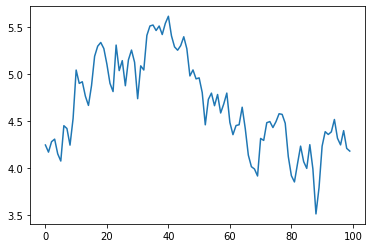

In [30]:
plt.plot(POS_VAR)

In [31]:
max(VAR), min(VAR)

(-3.5126294239896763, -5.613749940409693)

In [32]:
max(VAR), min(VAR)

(-3.5126294239896763, -5.613749940409693)

In [ ]:
# textfile = open("a_file.txt", "w")
# for element in VAR:
#     textfile.write(element + "\n")
# textfile.close()

In [33]:
# ff = []
# for f in FINAL['ETH']['date']:
#     ff.append(f)

MARKET_FINAL_DF = pd.DataFrame(columns= cols)
ind = 0
for i in range(100):
    assets = []
    for col in cols:
        try:
            assets.append(FINAL[col]['MARKET'][i])
        except Exception as e:
            assets.append([])
    MARKET_FINAL_DF.loc[ind] = assets
    ind += 1

/home/nishgaba/anaconda3/envs/defi/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [34]:
for i in range(MARKET_FINAL_DF.shape[0]):
    for j in range(1,MARKET_FINAL_DF.shape[1]-1):
        if isinstance(MARKET_FINAL_DF.iloc[i,j], list):
            print(MARKET_FINAL_DF.iloc[i,j])
            MARKET_FINAL_DF.iloc[i,j] = 0
            
        if 'e' in str(MARKET_FINAL_DF.iloc[i,j]):
            MARKET_FINAL_DF.iloc[i,j] = 0

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [35]:
MARKET_FINAL_DF['DATE'] = ff[:100]
MARKET_FINAL_DF['timestamp'] = MARKET_FINAL_DF['DATE'].apply(lambda x: pd.Timestamp(x).timestamp())
MARKET_FINAL_DF = MARKET_FINAL_DF.sort_values('timestamp')
MARKET_FINAL_DF = MARKET_FINAL_DF[::-1]

In [36]:
MARKET_FINAL_DF[MARKET_FINAL_DF.columns[:-2]].sum(axis=1)

0     1.677138e+10
1     1.672277e+10
2     1.690604e+10
3     1.712496e+10
4     1.689435e+10
          ...     
95    1.939853e+10
96    1.927298e+10
97    1.971654e+10
98    1.938079e+10
99    1.912813e+10
Length: 100, dtype: float64

In [37]:
# ff = []
# for f in FINAL['ETH']['date']:
#     ff.append(f)

BORROW_FINAL_DF = pd.DataFrame(columns=cols)
ind = 0
for i in range(100):
    assets = []
    for col in cols:
        try:
            assets.append(FINAL[col]['BORROW'][i])
        except:
            assets.append([])
    
    BORROW_FINAL_DF.loc[ind] = assets
    ind += 1

In [38]:
for i in range(BORROW_FINAL_DF.shape[0]):
    for j in range(1,BORROW_FINAL_DF.shape[1]-1):
        if isinstance(BORROW_FINAL_DF.iloc[i,j], list):
            print(BORROW_FINAL_DF.iloc[i,j])
            BORROW_FINAL_DF.iloc[i,j] = 0
            
        if 'e' in str(BORROW_FINAL_DF.iloc[i,j]):
            BORROW_FINAL_DF.iloc[i,j] = 0

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [39]:
BORROW_FINAL_DF['DATE'] = ff[:100]
BORROW_FINAL_DF['timestamp'] = BORROW_FINAL_DF['DATE'].apply(lambda x: pd.Timestamp(x).timestamp())
BORROW_FINAL_DF = BORROW_FINAL_DF.sort_values('timestamp')
BORROW_FINAL_DF = BORROW_FINAL_DF[::-1]

In [40]:
BORROW_FINAL_DF[BORROW_FINAL_DF.columns[:-2]].sum(axis=1)

0     6.982832e+09
1     6.982635e+09
2     6.998439e+09
3     7.046248e+09
4     7.087771e+09
          ...     
95    8.637090e+09
96    8.670470e+09
97    8.838770e+09
98    8.791057e+09
99    8.787571e+09
Length: 100, dtype: float64

In [52]:
BORROW_FINAL_DF.head()

,AAVE,BAT,DAI,ETH,LINK,MKR,REP,SUSHI,TUSD,UNI,USDC,USDT,WBTC,WBTC2,YFI,ZRX,DATE,timestamp
0,55614.273679,8.984623e+06,3.449546e+09,2.134947e+08,7.306941e+06,21855.042698,22852.8,125770.937298,4.822066e+07,9.358679e+06,2.514774e+09,6.170403e+08,29963.941953,1.064153e+08,226098.390363,7.209204e+06,2021-12-19,1.639872e+09
1,52947.403642,8.810181e+06,3.443046e+09,2.106446e+08,6.846951e+06,21462.724046,39911.6,126385.990056,4.837517e+07,9.002649e+06,2.526376e+09,6.167514e+08,30804.717281,1.049986e+08,240556.614222,7.271445e+06,2021-12-18,1.639786e+09
2,50379.993934,8.651572e+06,3.472635e+09,2.164734e+08,7.028329e+06,21901.917272,40366.5,128834.771531,4.808768e+07,8.655443e+06,2.502666e+09,6.184882e+08,31562.195418,1.079414e+08,178591.718655,7.360946e+06,2021-12-17,1.639699e+09
3,50110.899985,8.551155e+06,3.475327e+09,2.203966e+08,7.367539e+06,15938.619902,40986.4,134412.951583,4.812644e+07,9.128359e+06,2.541908e+09,6.174158e+08,31203.001167,1.105915e+08,149564.037394,7.013766e+06,2021-12-16,1.639613e+09
4,48907.654468,8.036739e+06,3.497025e+09,2.049231e+08,6.654065e+06,15447.224448,41721.8,130323.177060,4.820215e+07,8.986603e+06,2.586890e+09,6.104213e+08,30197.082830,1.093331e+08,145811.072285,6.886579e+06,2021-12-15,1.639526e+09


In [53]:
MARKET_FINAL_DF.head()

,AAVE,BAT,DAI,ETH,LINK,MKR,REP,SUSHI,TUSD,UNI,USDC,USDT,WBTC,WBTC2,YFI,ZRX,DATE,timestamp
0,2.481806e+06,1.361061e+08,4.286386e+09,5.912073e+09,4.708146e+07,3.795698e+06,28052.3,777008.888371,8.692119e+07,1.347373e+08,3.487078e+09,8.809222e+08,1.107671e+08,1.581576e+09,1.399851e+06,9.924629e+07,2021-12-19,1.639872e+09
1,2.363297e+06,1.335438e+08,4.251994e+09,5.803363e+09,4.410213e+07,3.727216e+06,30788.5,762450.196209,8.675960e+07,1.299413e+08,3.609192e+09,8.786670e+08,1.139242e+08,1.562685e+09,1.490396e+06,1.002203e+08,2021-12-18,1.639786e+09
2,2.247205e+06,1.309151e+08,4.230925e+09,5.966029e+09,4.482974e+07,3.298291e+06,31139.4,773578.521991,8.678665e+07,1.249825e+08,3.610245e+09,8.798664e+08,1.183613e+08,1.604182e+09,1.106486e+06,1.014574e+08,2021-12-17,1.639699e+09
3,2.396313e+06,1.297193e+08,4.300993e+09,6.005338e+09,4.666970e+07,2.709334e+06,31617.6,807072.277044,8.685662e+07,1.318664e+08,3.659041e+09,8.817666e+08,1.186309e+08,1.659009e+09,9.266413e+05,9.820203e+07,2021-12-16,1.639613e+09
4,2.181281e+06,1.218670e+08,4.329194e+09,5.779835e+09,4.323803e+07,2.625804e+06,32184.9,784996.826299,8.710203e+07,1.298182e+08,3.656660e+09,8.856273e+08,1.148065e+08,1.643232e+09,9.033894e+05,9.644405e+07,2021-12-15,1.639526e+09


In [54]:
len(BORROW_FINAL_DF.columns)

18

In [55]:
len(BORROW_FINAL_DF)

100

In [56]:
CONS_DATA = pd.DataFrame(columns=["date", "Liabilities", "Assets", "VAR", "VAR_DATE", "timestamp"])

In [57]:
CONS_DATA['date'] = MARKET_FINAL_DF['DATE'] 

In [58]:
CONS_DATA['timestamp'] = MARKET_FINAL_DF['timestamp'] 

In [59]:
CONS_DATA['Assets'] = BORROW_FINAL_DF[BORROW_FINAL_DF.columns[:-2]].sum(axis=1)

In [60]:
CONS_DATA['Liabilities'] = MARKET_FINAL_DF[MARKET_FINAL_DF.columns[:-2]].sum(axis=1)

In [61]:
CONS_DATA["VAR"] = VAR

In [62]:
CONS_DATA["VAR_DATE"] = VAR_DATE

In [63]:
# Saving to CSV
CONS_DATA.to_csv("compound-historical-dec-20.csv", index=False)